<a href="https://colab.research.google.com/github/DrMessy/DrMessy/blob/main/Test20230519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


In [ ]:
# !pip install pmdarima
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


# df = pd.read_excel('Data.xlsx')

In [ ]:
df1 = df.groupby('Day')['Entered'].sum().reset_index(name='Entered')
df1.head()

,Day,Entered
0,2022-01-01,400
1,2022-01-02,6211
2,2022-01-03,10303
3,2022-01-04,13516
4,2022-01-05,13733


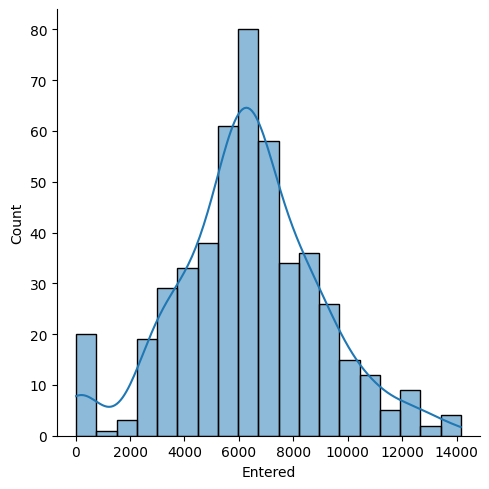

In [ ]:
sns.displot(df1, x="Entered",kde=True)

<Axes: xlabel='Entered'>

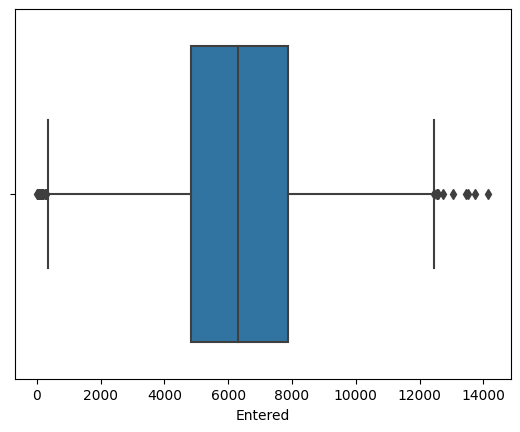

In [ ]:
sns.boxplot(x="Entered",data=df1)

<Axes: xlabel='Day', ylabel='Entered'>

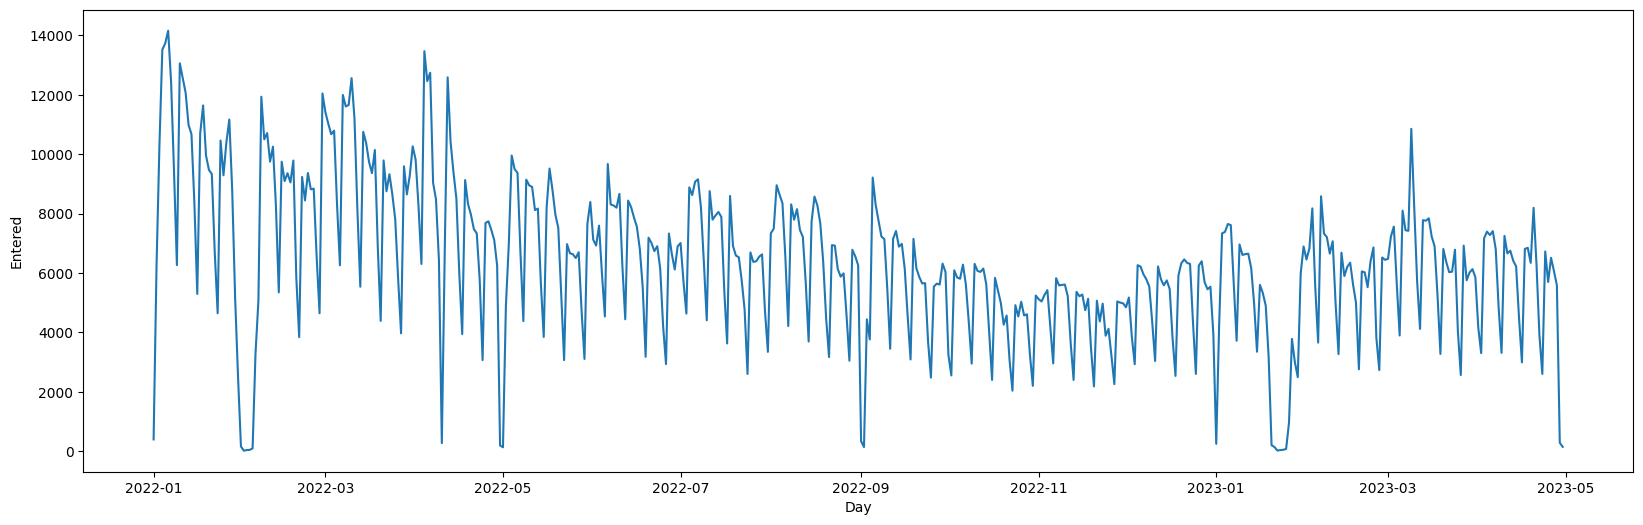

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="Day", y="Entered",data=df1)

In [ ]:
# adm = sm.tsa.stattools.adfuller(df1['Entered'])
# print('ADF Statistic for Entered: %f' % adm[0])
# print('p-value: %f' % adm[1])
# print('Critical Values:')
# for key, value in adm[4].items():
#     print('\t%s: %.3f' % (key, value))

In [ ]:
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(df1['Entered'], lags=40, ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(df1['Entered'], lags=40, ax=ax2)
# plt.show()

In [ ]:
# def _arima_fit(orders, data):
#   models = dict()
#   for order in orders:
#     model = sm.tsa.arima.ARIMA(df1['Entered'], order= order).fit()
#     model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
#     print('{} --> AIC={}; BIC={}'.format(model_name, model.aic, model.bic))
#     models[model_name] = model
#   return models

# orders = [(1, 0, 1), (1, 0, 0), (0, 0, 1), (0, 0, 0)]
# models = _arima_fit(orders, df1['Entered'])

In [ ]:
# model = sm.tsa.arima.ARIMA(df1['Entered'], order=(1,0,1))
# model_fit = model.fit()
# print(model_fit.summary())

In [ ]:
# df1['Forecast'] = model_fit.predict(start=454, end=484, dynamic = True)
# # df[['Entered','Forecast']].plot(figsize=(12,8))
# # df1 = df1.drop(columns = ['Forecast'])
# df1.tail()

In [ ]:
# train, test = df1[df1['Day'] < '2023-04-01'], df1[df1['Day'] >= '2019-04-01']
# print('train shape: ', train.shape)
# print('test shape: ', test.shape)

In [ ]:
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(train['Entered'], lags=40, ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(train['Entered'], lags=40, ax=ax2)
# plt.show()

In [ ]:
# dates_input = train["Day"].values.astype('datetime64[D]')
# model_sarima = auto_arima(dates_input, start_p=0, start_q=0,
#                            max_p=5, max_q=5, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

# print(model_sarima.aic())

In [ ]:
# n_pred_perious = 30
# fitted, confint = model_sarima.predict(n_periods=n_pred_perious, return_conf_int=True)
# date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='MS')

# fitted_seri = pd.Series(fitted, index=date)
# lower = confint[:, 0]
# upper = confint[:, 1]

# plt.figure(figsize=(12, 6))
# plt.plot(df1, label='Actual')
# plt.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
# plt.fill_between(date, 
#                  lower, 
#                  upper,
#                  color='grey', alpha=0.2)
# plt.ylim((0, 100000))
# plt.legend()
# plt.title('SARIMA regression model forecast for 30 next days')
# plt.show()

In [ ]:
df_season = pd.read_excel('Data.xlsx', parse_dates=['Day'], index_col='Day')

In [ ]:
df2 = df_season.groupby('Day')['Entered'].sum().reset_index(name='Entered')
df2.tail ()

,Day,Entered
480,2023-04-26,6510
481,2023-04-27,6065
482,2023-04-28,5589
483,2023-04-29,287
484,2023-04-30,151


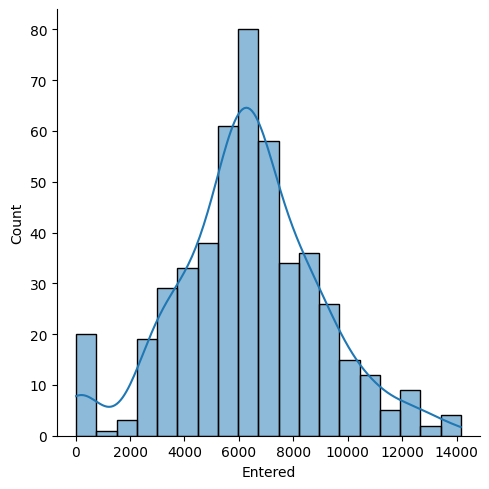

In [ ]:
sns.displot(df2, x="Entered",kde=True)

<Axes: xlabel='Entered'>

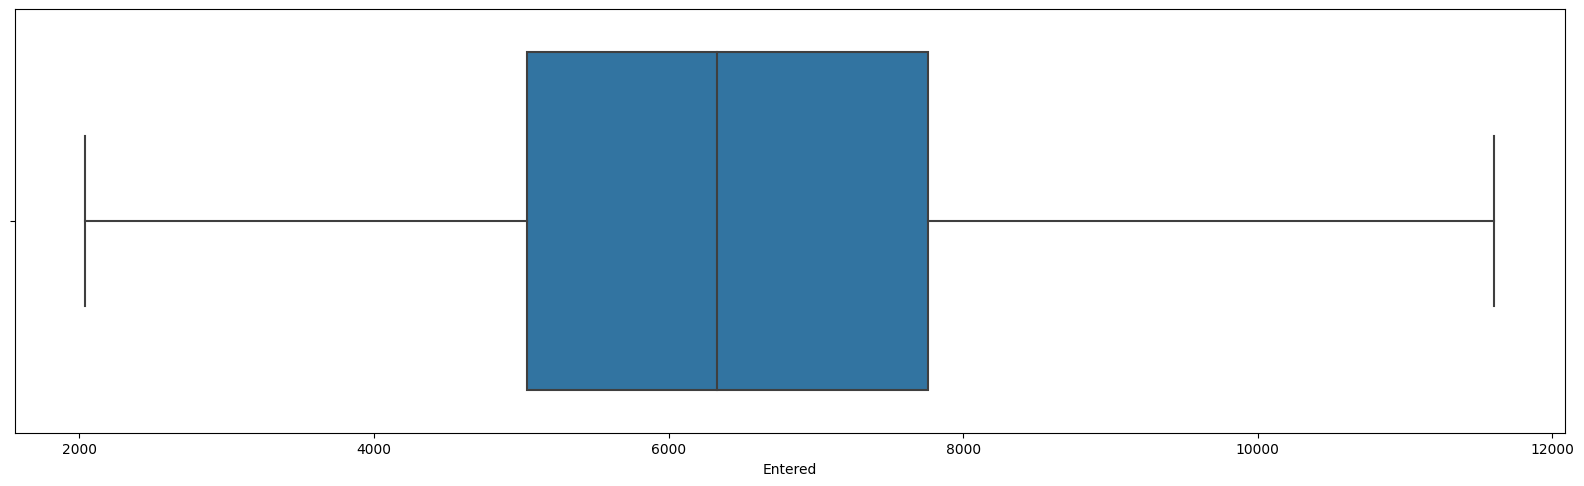

In [ ]:
sns.boxplot(x="Entered",data=df2)

In [ ]:
# x = 2
# lower  = df2['Entered'].mean() - x*df2['Entered'].std()
# upper  = df2['Entered'].mean() + x*df2['Entered'].std()

# upper_array = np.where(df2['Entered']>=upper)[0]
# lower_array = np.where(df2['Entered']<=lower)[0]

# df2.drop(index=upper_array, inplace=True)
# df2.drop(index=lower_array, inplace=True)
# print("New Shape: ", df2.shape)
df2.tail()

,Day,Entered
478,2023-04-24,6725
479,2023-04-25,5699
480,2023-04-26,6510
481,2023-04-27,6065
482,2023-04-28,5589


In [ ]:
# print("Old Shape: ", df2.shape)
# Q1 = df2['Entered'].quantile(0.25)
# Q3 = df2['Entered'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
# # print(lower)
# # print(upper)
 
# # Create arrays of Boolean values indicating the outlier rows
# upper_array = np.where(df2['Entered']>=upper)[0]
# lower_array = np.where(df2['Entered']<=lower)[0]
 
# # Removing the outliers
# df2.drop(index=upper_array, inplace=True)
# df2.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
# print("New Shape: ", df2.shape)

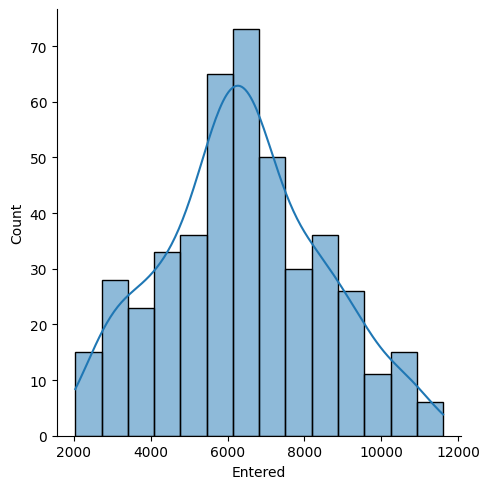

In [ ]:
sns.displot(df2, x="Entered",kde=True)

<Axes: xlabel='Entered'>

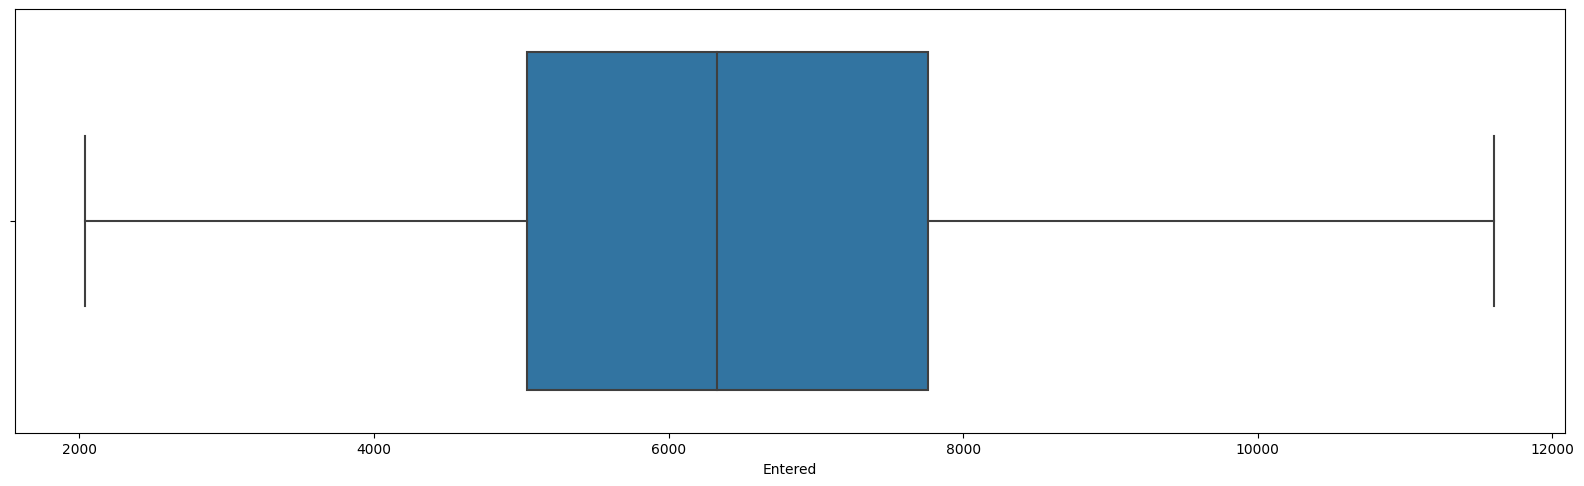

In [ ]:
sns.boxplot(x="Entered",data=df2)

In [ ]:
# df3 = df2.drop('Day', axis = 1)
# a = df3['Entered']
# b = df3['Entered'].shift(1)
# r_t = np.log(df2['Entered']/df2['Entered'].shift(1))
# mean = np.nanmean(r_t)
# r_t[0]=mean

# r_t1 = df2['Entered'] - df2['Entered'].shift(1)
# mean1 = np.nanmean(r_t1)
# r_t1[0]=mean1


In [ ]:
# print(r_t)

In [ ]:
# plt.figure(figsize=(16, 4))
# plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
# plt.axhline(y=mean, label='mean return', c='red')
# plt.title('Return rate according to date')
# plt.xlabel('Date Order')
# plt.ylabel('Return Rate')
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 8))
# plt.scatter(x=r_t[1:], y=r_t[:-1])
# plt.title('Return rate vs Lag order 1 according to date')
# plt.xlabel('r(t-1)')
# plt.ylabel('r(t)')
# plt.show()

In [ ]:
# plt.figure(figsize = (8, 6))
# sns.distplot(r_t, bins = 20)
# plt.axvline(x=mean, label='mean return', c='red')
# plt.title('Distribution return of Entered')
# plt.legend()
# plt.xlabel('return rate')
# plt.ylabel('frequency')

In [ ]:
# sm.qqplot(r_t)
# plt.show()

Option 1

In [ ]:
# result = adfuller(r_t1)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))

In [ ]:
# dates_input = train1["Day"].values.astype('datetime64[D]')
# model_sarima = auto_arima(r_t1, start_p=0, start_q=0,
#                            max_p=5, max_q=5, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

# print(model_sarima.aic())

In [ ]:
# model = sm.tsa.arima.ARIMA(r_t1,
# order=(3, 1, 0),
# seasonal_order=(2, 1, 0, 12),
# enforce_stationarity=False,
# enforce_invertibility=False)
# model_fit = model.fit()
# print(model_fit.summary())

In [ ]:
# df21 = df2.set_index('Day')
# df21.head()

# # df22 = df2.drop('Day', axis=1)

# plt.rcParams["figure.figsize"] = (15,5.5)

# fig, ax = plt.subplots()
# # ax = df22.plot(ax=ax)
# # ax = df22.loc[:200].plot(ax=ax)
# ax = r_t1.loc[:100].plot(ax=ax)
# plot_predict(model_fit, 0,100, dynamic = False, ax=ax)
# plt.show()

Option 2

In [ ]:
train1, test1 = df2[df2['Day'] < '2023-04-01'], df2[df2['Day'] >= '2023-04-01']
print('train1 shape: ', train1.shape)
print('test1 shape: ', test1.shape)

train1 shape:  (419, 2)
test1 shape:  (28, 2)


In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# # df2['Day'] = pd.to_numeric(pd.to_datetime(df2['Day']))
# df2['Day'] = df2['Day'].fillna(0)
# df2x = df2.set_index('Day').asfreq('D')
# result = seasonal_decompose(df2x, model='multiplicative')
# # result = sm.tsa.seasonal_decompose(df2.asfreq('Day'), model = 'additive')
# fig = result.plot()
# fig.set_size_inches(16, 12)


In [ ]:
result1 = sm.tsa.stattools.adfuller(df2['Entered'])
print('ADF Statistic for Entered: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Entered: -2.531000
p-value: 0.108113
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570


In [ ]:
dates_input1 = train1["Day"].values.astype('datetime64[D]')
model_sarima1 = auto_arima(dates_input1, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_sarima1.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=697.517, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=901.704, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=781.839, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=699.437, Time=1.30 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=698.907, Time=0.74 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=698.897, Time=1.83 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=779.969, Time=0.19 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=4.73 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=699.420, Time=1.56 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=699.891, Time=2.02 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.08 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 14.408 seconds
697.5166093914763


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


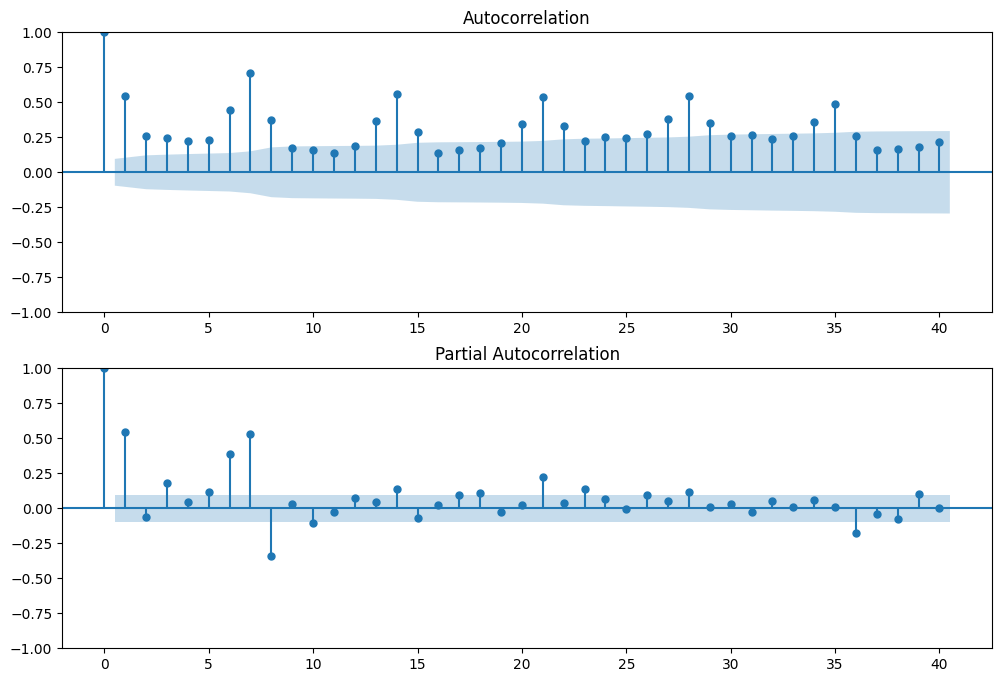

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train1['Entered'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train1['Entered'], lags=40, ax=ax2)
plt.show()

In [ ]:
model1 = sm.tsa.arima.ARIMA(df2['Entered'],
order=(0, 1, 0),
seasonal_order=(0, 1, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False)
model_fit1 = model1.fit()
print(model_fit1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Entered   No. Observations:                  447
Model:             ARIMA(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -3835.387
Date:                            Fri, 19 May 2023   AIC                           7674.774
Time:                                    07:04:47   BIC                           7682.859
Sample:                                         0   HQIC                          7677.969
                                            - 447                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9470      0.071    -13.398      0.000      -1.086      -0.808
sigma2      7.567e+06   7.98e+05   

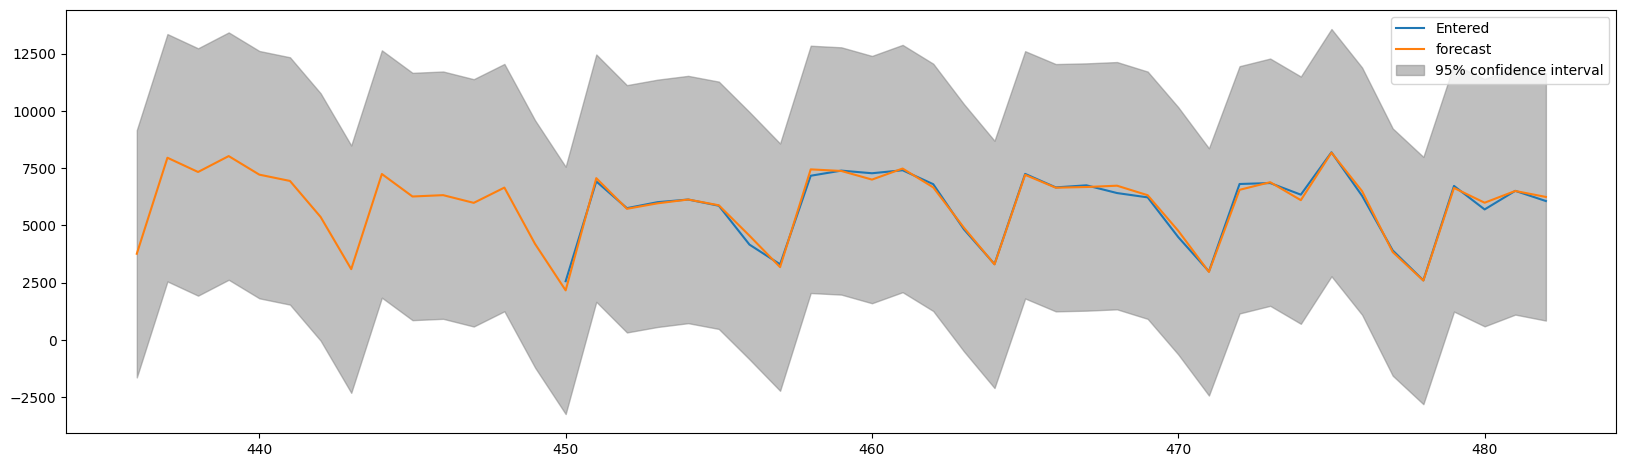

In [ ]:
# df21 = df2.set_index('Day')
# df21.head()

df22 = df2.drop('Day', axis=1)
df23 = df2.drop('Day', axis=1).shift(1)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5.5)

fig, ax = plt.subplots()
# ax = df22.plot(ax=ax)
ax = df23.loc[450:].plot(ax=ax)
# ax = prd.plot(ax=ax)
plot_predict(model_fit1,400, ax=ax)

# ax = df22.plot(ax=ax)
# plot_predict(model_fit1, ax=ax)
plt.show()

In [ ]:
prd = model_fit1.predict(418,447, dynamic=True).reset_index(name = 'Entered')
# prd = prd.drop('index', axis = 1)
prd['Day'] = pd.date_range(start='2023/04/01', periods=len(prd), freq='D')
prd = prd[['Day', 'Entered']]
print(prd)
prd.info()

          Day      Entered
0  2023-04-01  6131.758455
1  2023-04-02  6151.868855
2  2023-04-03  6541.104666
3  2023-04-04  6417.692909
4  2023-04-05  6695.728128
5  2023-04-06  6680.235371
6  2023-04-07  6403.529495
7  2023-04-08  6478.287615
8  2023-04-09  6338.775318
9  2023-04-10  6408.915190
10 2023-04-11  6396.174764
11 2023-04-12  6354.691489
12 2023-04-13  6355.449944
13 2023-04-14  6375.560344
14 2023-04-15  6764.796154
15 2023-04-16  6641.384398
16 2023-04-17  6919.419617
17 2023-04-18  6903.926860
18 2023-04-19  6627.220983
19 2023-04-20  6701.979103
20 2023-04-21  6562.466807
21 2023-04-22  6632.606678
22 2023-04-23  6619.866253
23 2023-04-24  6578.382977
24 2023-04-25  6579.141432
25 2023-04-26  6599.251832
26 2023-04-27  6988.487643
27 2023-04-28  6865.075887
28 2023-04-29  7143.111105
29 2023-04-30  7127.618349
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Day', ylabel='Entered'>

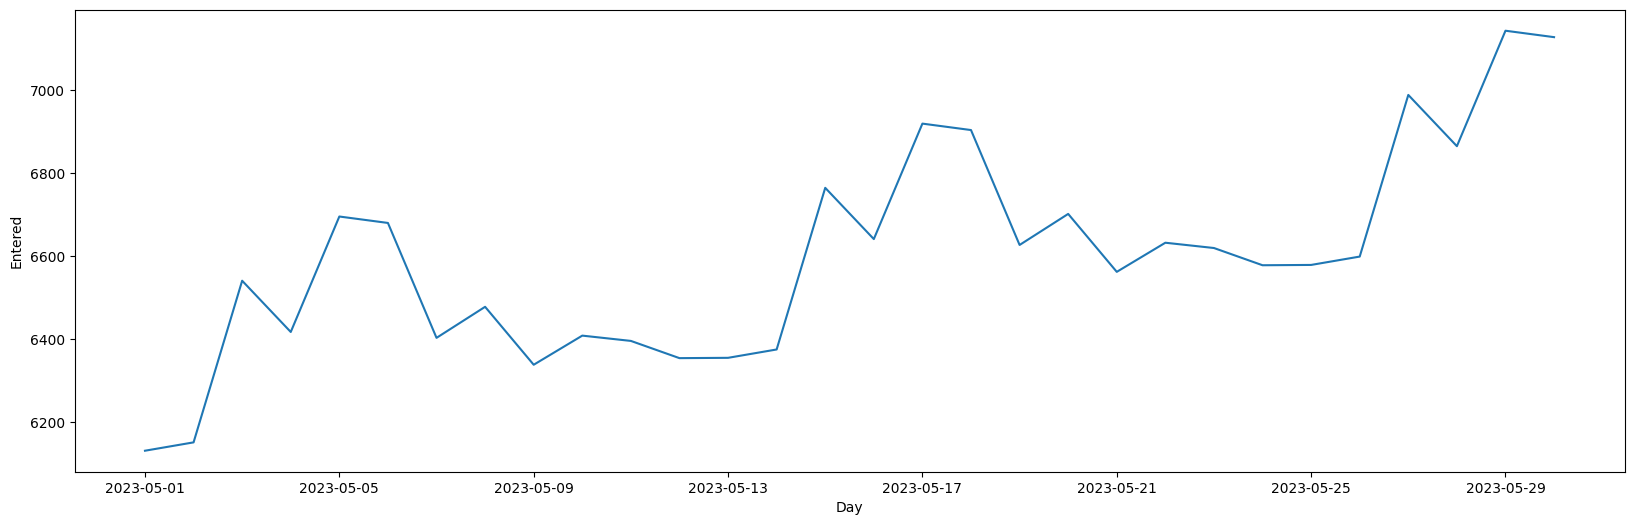

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="Day", y="Entered",data=prd)

In [ ]:
# df3 = (df2.reset_index()).reset_index()
# df3 = df3.drop('index', axis = 1)
# df3['Forecast'] = model_fit1.predict(start = 448, end = 478, dynamic=False)
df4 = pd.concat([df3,prd])
# df4 = df4.remove(['index', 'level_0'],axis = 2)
df4['Type'] = np.where(df4['level_0'] >=0,'Actual','Forecast')
df4 = df4.drop('level_0',axis = 1)
print(df4)
# df3.info()

          Day       Entered      Type
0  2022-01-02   6211.000000    Actual
1  2022-01-03  10303.000000    Actual
2  2022-01-08   9450.000000    Actual
3  2022-01-09   6266.000000    Actual
4  2022-01-13  10985.000000    Actual
..        ...           ...       ...
26 2023-05-27   5717.679951  Forecast
27 2023-05-28   5598.530360  Forecast
28 2023-05-29   5660.608820  Forecast
29 2023-05-30   5522.104982  Forecast
30 2023-05-31   5738.388221  Forecast

[478 rows x 3 columns]


<Axes: xlabel='Day', ylabel='Entered'>

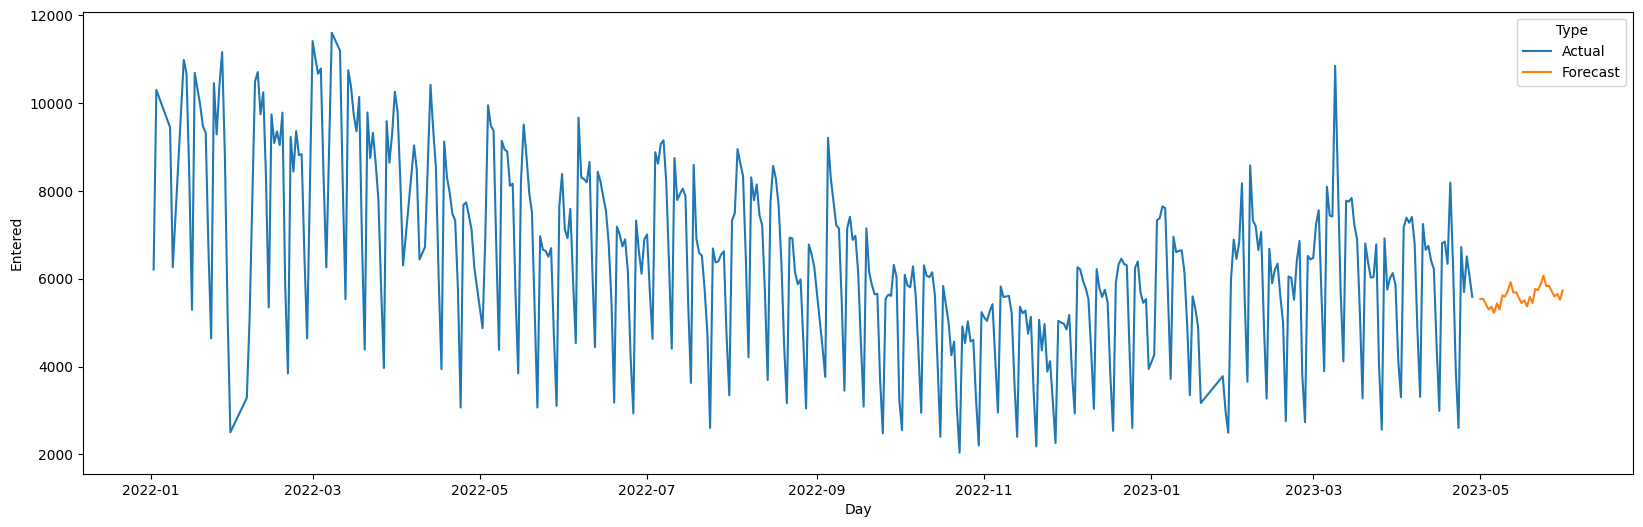

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(x="Day", y="Entered",hue = 'Type',data=df4)